<a href="https://colab.research.google.com/github/dominiksakic/NETworkingMay/blob/main/15_visualize_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing convnet filters
- previously we took a sample picture and looked at all the transformations of the pictures.
- now we will look at the filters causing the transformations

In [27]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

model = keras.applications.xception.Xception(weights='imagenet', include_top='False')

for layer in model.layers:
  if isinstance(layer, (keras.layers.Conv2D, keras.layers.SeparableConv2D)):
    print(layer.name)

block1_conv1
block1_conv2
block2_sepconv1
block2_sepconv2
conv2d_32
block3_sepconv1
block3_sepconv2
conv2d_33
block4_sepconv1
block4_sepconv2
conv2d_34
block5_sepconv1
block5_sepconv2
block5_sepconv3
block6_sepconv1
block6_sepconv2
block6_sepconv3
block7_sepconv1
block7_sepconv2
block7_sepconv3
block8_sepconv1
block8_sepconv2
block8_sepconv3
block9_sepconv1
block9_sepconv2
block9_sepconv3
block10_sepconv1
block10_sepconv2
block10_sepconv3
block11_sepconv1
block11_sepconv2
block11_sepconv3
block12_sepconv1
block12_sepconv2
block12_sepconv3
block13_sepconv1
block13_sepconv2
conv2d_35
block14_sepconv1
block14_sepconv2


In [58]:
# Create a feature extractor model
layer_name = "conv2d_35"
layer = model.get_layer(name=layer_name)
feature_extractor = keras.Model(inputs=model.input, outputs=layer.output)

feature_extractor.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 149, 149,  │        864 │ input_layer_8[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 149, 149,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 149, 149,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 147, 147,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 147, 147,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 147, 147,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 147, 147,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 147, 147,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 147, 147,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 147, 147,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 147, 147,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_32 (Conv2D)  │ (None, 74, 74,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 74, 74,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 74, 74,    │        512 │ conv2d_32[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_96 (Add)        │ (None, 74, 74,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 74, 74,    │          0 │ add_96[0][0]    

 Total params: 14,805,848 (56.48 MB)

 Trainable params: 14,764,040 (56.32 MB)

 Non-trainable params: 41,808 (163.31 KB)

In [59]:
img_path = keras.utils.get_file(
    fname="cat.jpg",
    origin="https://img-datasets.s3.amazonaws.com/cat.jpg")

def get_img_array(img_path, target_size):
    img = keras.utils.load_img(img_path, target_size=target_size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

img_tensor = get_img_array(img_path, target_size=(299, 299))

# Dont call .predict on the model, since we cannot get the gradient decent via .predict
# .predict is good if output values only are needed
activation = feature_extractor(keras.applications.xception.preprocess_input(img_tensor))

In [60]:
def compute_loss(image, filter_index):
  activation = feature_extractor(image) # use the feature_extractor to get the ouput of layer
  filter_activation = activation[:, 2:-2, 2:-2, filter_index] # avoid border artifacts
  return tf.reduce_mean(filter_activation)

In [61]:
@tf.function
def gradient_ascent_step(image, filter_index, learning_rate):
  """
  Compute the loss scalar, indicating how much the current image activates the filter.
  Compute the gradients of the loss with respect to the image.
  Move the image a little bit in a direction that activates out target filter more strongly.
  Return the modified image.

  We morph the image into the filter!
  """
  with tf.GradientTape() as tape:
    tape.watch(image)
    loss = compute_loss(image, filter_index)
  grads = tape.gradient(loss, image)
  grads = tf.math.l2_normalize(grads)
  image += learning_rate * grads
  return image

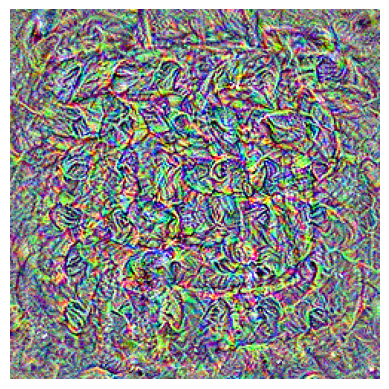

In [62]:
img_width = 299
img_height = 299

def generate_filter_pattern(filter_index):
  """
  Generats a pattern of the filter.
  Initialize a random image that is compatible with X ception models
  """
  iterations = 30
  learning_rate = 10.
  image = tf.random.uniform(
      minval=0.4,
      maxval=0.6,
      shape=(1, img_width, img_height, 3))
  for i in range(iterations):
    image = gradient_ascent_step(image, filter_index, learning_rate)
  return image[0].numpy()


def deprocess_image(image):
  image -= image.mean()
  image /= image.std()
  image *= 64
  image += 128
  image = np.clip(image, 0, 255).astype("uint8")
  image = image[25:-25, 25:-25, :]
  return image


plt.axis("off")
plt.imshow(deprocess_image(generate_filter_pattern(filter_index=1)))

In [46]:
# Generate and save visualizations for 64 filters in the layer
all_images = []
for filter_index in range(64):
  print(f"Processing filter {filter_index}")
  image = deprocess_image(
      generate_filter_pattern(filter_index))
  all_images.append(image)

  # Prepare a blank canvas for the filters
  margin = 5
  n = 8
  cropped_width = img_width - 25 * 2
  cropped_height = img_height - 25 * 2
  width = n * cropped_width + (n - 1) * margin
  height = n * cropped_height + (n - 1) * margin
  stitched_filters = np.zeros((width, height, 3))

  # Fill the picture with the saved fitlers.
  for i in range(n):
    for j in range(n):
      image_index = i * n + j
      if image_index < len(all_images):
        image = all_images[image_index]

        image = all_images[i * n + j]
        row_start = (cropped_width + margin) * i
        row_end = (cropped_width + margin) * i + cropped_width
        column_start = (cropped_height + margin) * j
        column_end = (cropped_height + margin) * j + cropped_height

        stitched_filters[
              row_start: row_end,
              column_start: column_end, :] = image

  keras.utils.save_img(f"filters_for_layer_{layer_name}.png", stitched_filters)

Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15
Processing filter 16
Processing filter 17
Processing filter 18
Processing filter 19
Processing filter 20
Processing filter 21
Processing filter 22
Processing filter 23
Processing filter 24
Processing filter 25
Processing filter 26
Processing filter 27
Processing filter 28
Processing filter 29
Processing filter 30
Processing filter 31
Processing filter 32
Processing filter 33
Processing filter 34
Processing filter 35
Processing filter 36
Processing filter 37
Processing filter 38
Processing filter 39
Processing filter 40
Processing filter 41
Processing filter 42
Processing filter 43
Processing filter 44
Processing filter 45
Processing filter 46
Processing filter 47
Pr

- These filters tell you how convnets see the world.

- each layer in a convnet learns a collection of filters such that their inputs can be expressed as a combination of the fitlers

- This resembles hwo the Fourier transform decomposes signals onto a bank of cosine funcitons.

  - The filters from the first layers in the model encode simple directional edges and colors.

  - The filters from layers further down  encode simple textures made from combinations fo edges and colors.

  - filters in higher layers begin to resemble textures found in antural images like feathers, eyes and so on.